In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt


In [3]:
# Set time range (5 years)
end = dt.datetime.now()
start = end - dt.timedelta(days=365 * 5)

# Define list of asset tickers
assets = ["VTI", "SPY", "QQQ", "BND", "GLD"]

# Download adjusted closing prices
df = yf.download(assets, start=start, end=end, auto_adjust=False)["Adj Close"]

# Show the first few rows
print("Adjusted Close Prices:\n", df.head())


[*********************100%***********************]  5 of 5 completed

Adjusted Close Prices:
 Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2020-06-02  76.294739  162.600006  228.666626  286.446320  144.716202
2020-06-03  76.120857  159.600006  229.695282  290.258484  146.971573
2020-06-04  75.938232  161.279999  228.084335  289.496094  146.507523
2020-06-05  75.929558  158.009995  232.606628  296.915649  150.266495
2020-06-08  76.007843  159.720001  234.411652  300.504669  152.308411


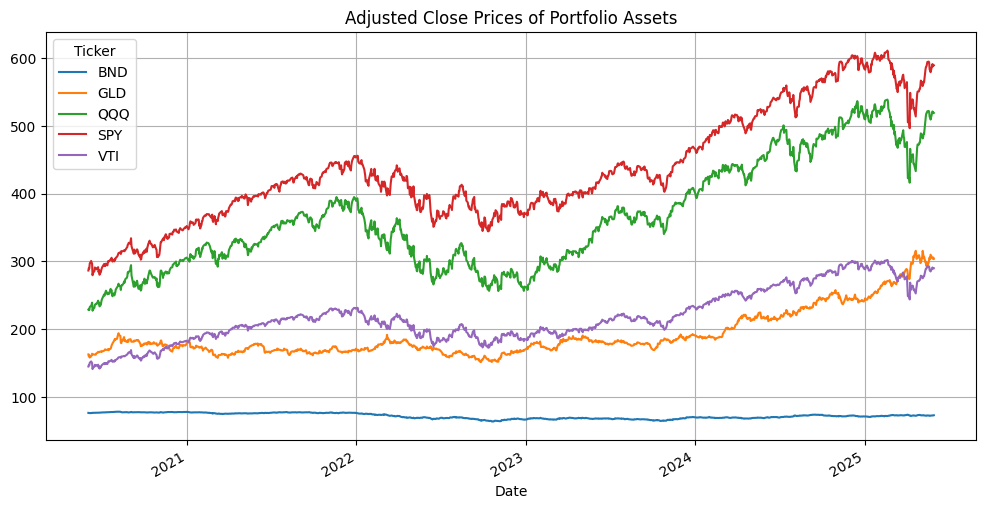

In [4]:
df.plot(figsize=(12,6), title="Adjusted Close Prices of Portfolio Assets")
plt.grid(True)
plt.show()


In [5]:
# Compute daily percentage returns
returns = df.pct_change().dropna()

# Display a few rows of returns
print("Daily Returns:\n", returns.head())


Daily Returns:
 Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2020-06-03 -0.002279 -0.018450  0.004498  0.013308  0.015585
2020-06-04 -0.002399  0.010526 -0.007013 -0.002627 -0.003157
2020-06-05 -0.000114 -0.020275  0.019827  0.025629  0.025657
2020-06-08  0.001031  0.010822  0.007760  0.012088  0.013589
2020-06-09  0.000686  0.009642  0.007245 -0.007457 -0.009141


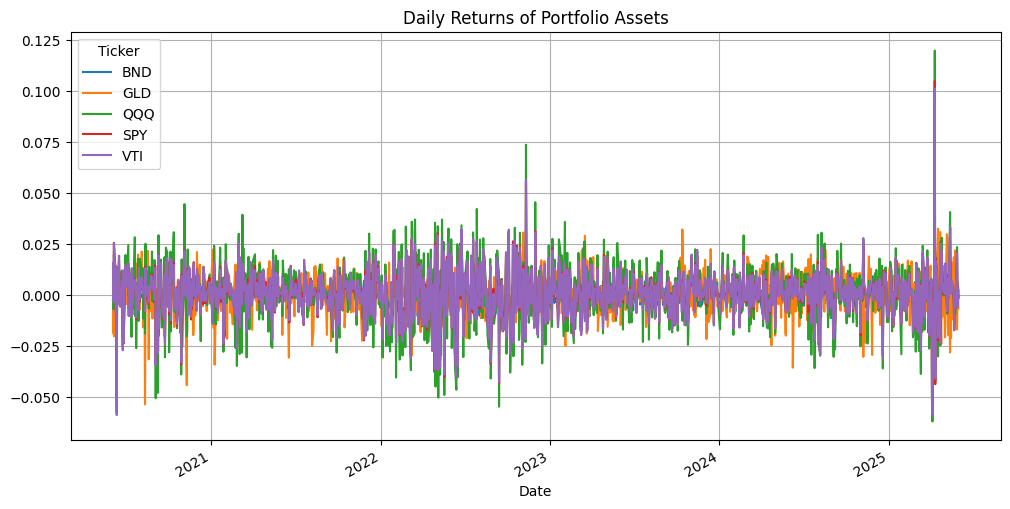

In [6]:
returns.plot(figsize=(12,6), title="Daily Returns of Portfolio Assets")
plt.grid(True)
plt.show()


In [7]:
# Equal weights for simplicity (you can customize)
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Check if weights sum to 1
print("Portfolio Weights Sum:", np.sum(weights))


Portfolio Weights Sum: 1.0


In [8]:
# Mean and covariance of daily returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Print means and covariance matrix
print("Mean Daily Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

# Portfolio mean and std dev (daily)
port_mean = np.dot(weights, mean_returns)
port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print(f"Portfolio Daily Mean Return: {port_mean:.6f}")
print(f"Portfolio Daily Standard Deviation: {port_std:.6f}")


Mean Daily Returns:
 Ticker
BND   -0.000031
GLD    0.000545
QQQ    0.000764
SPY    0.000639
VTI    0.000620
dtype: float64
Covariance Matrix:
 Ticker       BND       GLD       QQQ       SPY       VTI
Ticker                                                  
BND     0.000014  0.000012  0.000011  0.000008  0.000008
GLD     0.000012  0.000094  0.000021  0.000015  0.000016
QQQ     0.000011  0.000021  0.000222  0.000157  0.000160
SPY     0.000008  0.000015  0.000157  0.000127  0.000129
VTI     0.000008  0.000016  0.000160  0.000129  0.000133
Portfolio Daily Mean Return: 0.000507
Portfolio Daily Standard Deviation: 0.008160


In [9]:
confidence_level = 0.95
z_score = 1.65  # for 95% confidence

# Portfolio VaR
VaR_1day = z_score * port_std

print(f"1-Day Parametric VaR (95% Confidence): {VaR_1day:.4%}")


1-Day Parametric VaR (95% Confidence): 1.3464%


In [10]:
VaR_10day = VaR_1day * np.sqrt(10)
print(f"10-Day Parametric VaR (95% Confidence): {VaR_10day:.4%}")


10-Day Parametric VaR (95% Confidence): 4.2576%


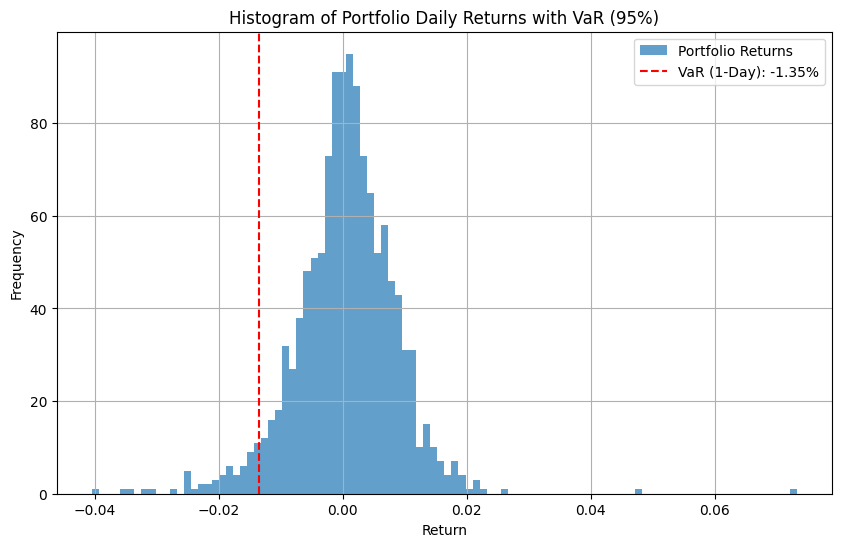

In [11]:
# Simulate portfolio returns
port_returns = returns.dot(weights)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(port_returns, bins=100, alpha=0.7, label='Portfolio Returns')
plt.axvline(-VaR_1day, color='r', linestyle='--', label=f'VaR (1-Day): {-VaR_1day:.2%}')
plt.title("Histogram of Portfolio Daily Returns with VaR (95%)")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
